<a href="https://colab.research.google.com/github/Karthik0528/Data-Science---ML/blob/main/HeartDiseaseSegmentation/Project_HeartDiseaseSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('/content/HeartDiseaseTrain-Test.csv')

In [3]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [5]:
# 1.3 quick info
df.info()
df.shape
df.isnull().sum()
# See unique values for each column (helps to decide encoding)
for col in df.columns:
    print(col, "->", df[col].nunique(), "unique:", df[col].unique()[:8])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

In [9]:
# make column names consistent (snake_case)
df.columns = [c.strip().lower().replace(' ', '_').replace('-', '_') for c in df.columns]
df.columns.tolist()


['age',
 'sex',
 'chest_pain_type',
 'resting_blood_pressure',
 'cholestoral',
 'fasting_blood_sugar',
 'rest_ecg',
 'max_heart_rate',
 'exercise_induced_angina',
 'oldpeak',
 'slope',
 'vessels_colored_by_flourosopy',
 'thalassemia',
 'target']

In [10]:
df.isnull().sum()

,0
age,0
sex,0
chest_pain_type,0
resting_blood_pressure,0
cholestoral,0
fasting_blood_sugar,0
rest_ecg,0
max_heart_rate,0
exercise_induced_angina,0
oldpeak,0


In [11]:
for col in df.columns:
    print(f"{col}: {df[col].unique()[:10]}")

age: [52 53 70 61 62 58 55 46 54 71]
sex: ['Male' 'Female']
chest_pain_type: ['Typical angina' 'Atypical angina' 'Non-anginal pain' 'Asymptomatic']
resting_blood_pressure: [125 140 145 148 138 100 114 160 120 122]
cholestoral: [212 203 174 294 248 318 289 249 286 149]
fasting_blood_sugar: ['Lower than 120 mg/ml' 'Greater than 120 mg/ml']
rest_ecg: ['ST-T wave abnormality' 'Normal' 'Left ventricular hypertrophy']
max_heart_rate: [168 155 125 161 106 122 140 145 144 116]
exercise_induced_angina: ['No' 'Yes']
oldpeak: [1.  3.1 2.6 0.  1.9 4.4 0.8 3.2 1.6 3. ]
slope: ['Downsloping' 'Upsloping' 'Flat']
vessels_colored_by_flourosopy: ['Two' 'Zero' 'One' 'Three' 'Four']
thalassemia: ['Reversable Defect' 'Fixed Defect' 'Normal' 'No']
target: [0 1]


In [14]:
df_clean = df.copy()

In [15]:
# 1. Gender
df_clean['sex'] = df_clean['sex'].map({'Male': 1, 'Female': 0})

# 2. Fasting Blood Sugar
df_clean['fasting_blood_sugar'] = df_clean['fasting_blood_sugar'].map({'Greater than 120 mg/ml': 1,'Lower than 120 mg/ml': 0})

# 3. Exercise-induced Angina
df_clean['exercise_induced_angina'] = df_clean['exercise_induced_angina'].map({'Yes': 1, 'No': 0})

# 4. Vessels Colored by Flourosopy
df_clean['vessels_colored_by_flourosopy'] = df_clean['vessels_colored_by_flourosopy'].map({'Zero': 0, 'One': 1, 'Two': 2, 'Three': 3, 'Four': 4})


In [17]:
df_clean[['sex','fasting_blood_sugar','exercise_induced_angina','vessels_colored_by_flourosopy']].head()

,sex,fasting_blood_sugar,exercise_induced_angina,vessels_colored_by_flourosopy
0,1,0,0,2
1,1,1,1,0
2,1,0,1,0
3,1,0,0,1
4,0,1,0,3


In [19]:
cat_cols = ['chest_pain_type', 'rest_ecg', 'slope', 'thalassemia']#it creating new variable cat_cols adn storing the columns name in one
df_encoded = pd.get_dummies(df_clean, columns=cat_cols, drop_first=True)#this first loads the data(df_clean) and goes to columns called cat_cols and drops the first category for each feature drop_first = True it prevents the dummy variable trap(multicollinearity)
df_encoded.head()

,age,sex,resting_blood_pressure,cholestoral,fasting_blood_sugar,max_heart_rate,exercise_induced_angina,oldpeak,vessels_colored_by_flourosopy,target,chest_pain_type_Atypical angina,chest_pain_type_Non-anginal pain,chest_pain_type_Typical angina,rest_ecg_Normal,rest_ecg_ST-T wave abnormality,slope_Flat,slope_Upsloping,thalassemia_No,thalassemia_Normal,thalassemia_Reversable Defect
0,52,1,125,212,0,168,0,1.0,2,0,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,1,155,1,3.1,0,0,False,False,True,True,False,False,True,False,False,True
2,70,1,145,174,0,125,1,2.6,0,0,False,False,True,False,True,False,True,False,False,True
3,61,1,148,203,0,161,0,0.0,1,0,False,False,True,False,True,False,False,False,False,True
4,62,0,138,294,1,106,0,1.9,3,0,False,False,True,False,True,True,False,False,False,False


In [20]:
print("Columns after encoding:")
print(df_encoded.columns.tolist())
print("\nNew shape:", df_encoded.shape)


Columns after encoding:
['age', 'sex', 'resting_blood_pressure', 'cholestoral', 'fasting_blood_sugar', 'max_heart_rate', 'exercise_induced_angina', 'oldpeak', 'vessels_colored_by_flourosopy', 'target', 'chest_pain_type_Atypical angina', 'chest_pain_type_Non-anginal pain', 'chest_pain_type_Typical angina', 'rest_ecg_Normal', 'rest_ecg_ST-T wave abnormality', 'slope_Flat', 'slope_Upsloping', 'thalassemia_No', 'thalassemia_Normal', 'thalassemia_Reversable Defect']

New shape: (1025, 20)


/tmp/ipython-input-3353103374.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df_encoded, palette='Set3')


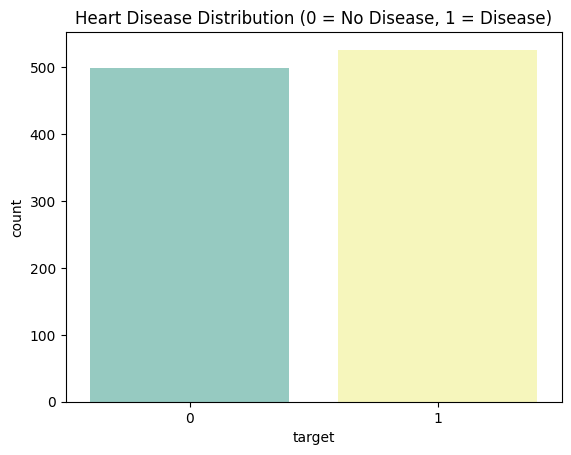

target
1    526
0    499
Name: count, dtype: int64


In [27]:
sns.countplot(x='target', data=df_encoded, palette='Set3')
plt.title('Heart Disease Distribution (0 = No Disease, 1 = Disease)')
plt.show()

# Numeric counts
print(df_encoded['target'].value_counts())

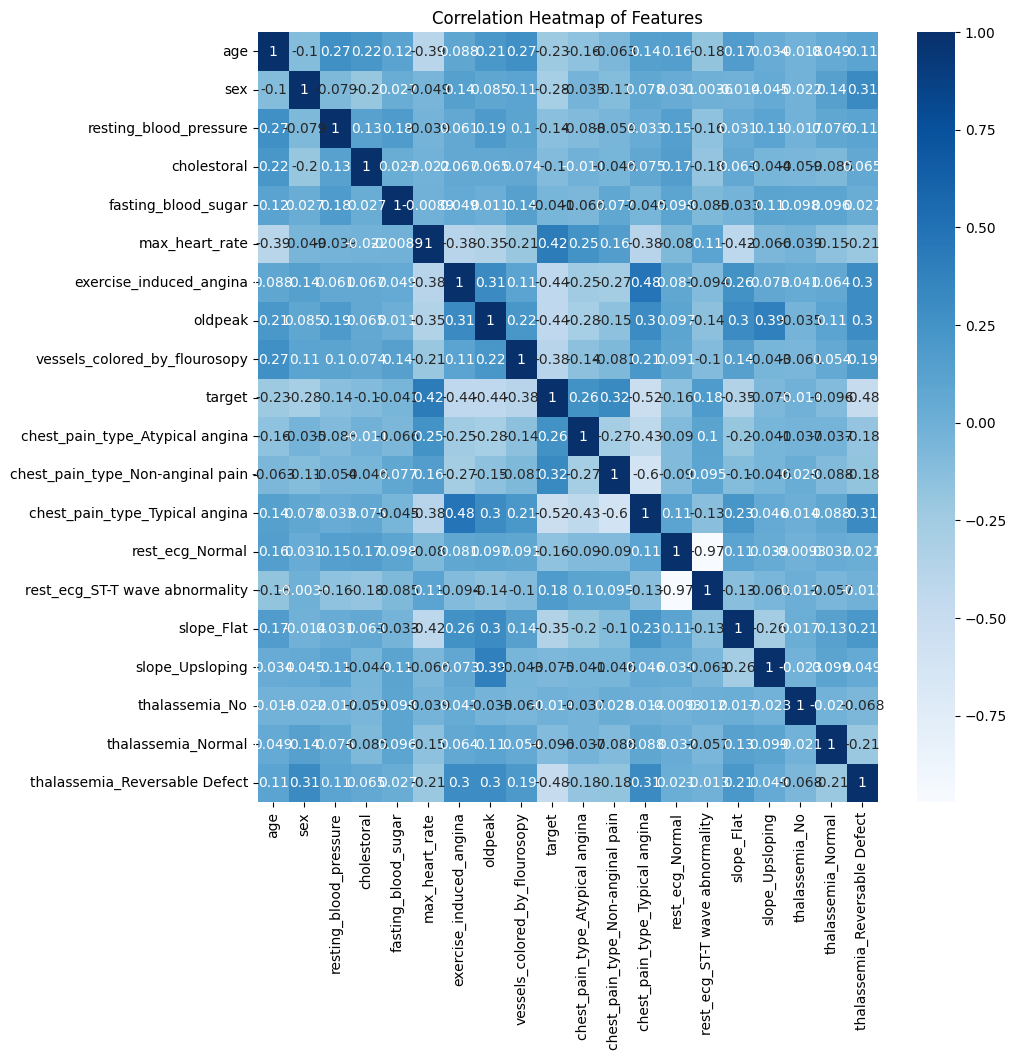

In [36]:
# Correlation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df_encoded.corr(), cmap='Blues', annot=True)
plt.title('Correlation Heatmap of Features')
plt.show()

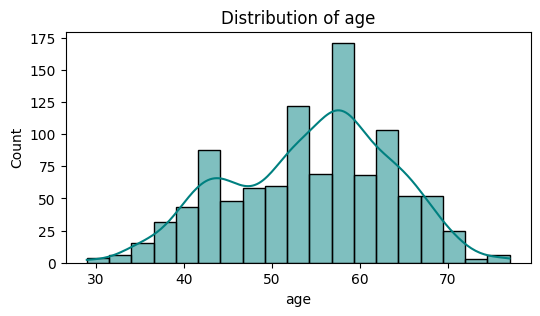

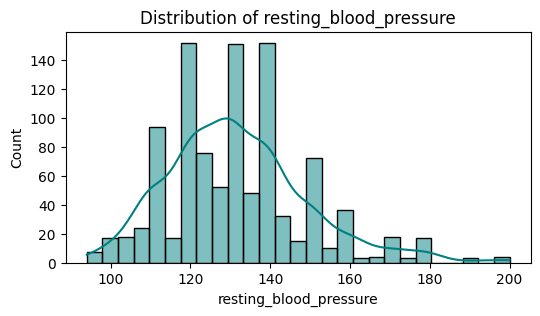

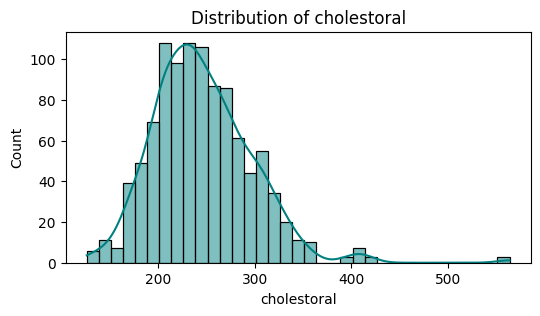

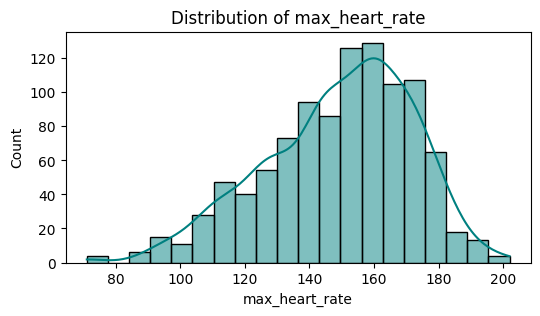

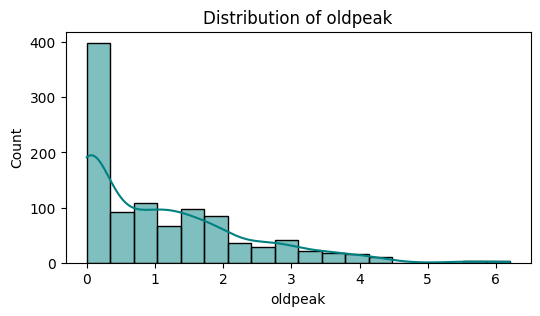

In [37]:
#  Example feature distributions
for col in ['age', 'resting_blood_pressure', 'cholestoral', 'max_heart_rate', 'oldpeak']:
    plt.figure(figsize=(6,3))
    sns.histplot(df_encoded[col], kde=True, color='teal')
    plt.title(f'Distribution of {col}')
    plt.show()


In [41]:
# Step 5.1: Split data
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)
print(X.shape, X_train.shape, X_test.shape)

# Step 5.2: Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


(1025, 19) (820, 19) (205, 19)


In [64]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=2),
    "SVM": SVC(kernel='rbf', probability=True, random_state=2)
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n=== {name} ===")
    print("Accuracy:", round(acc, 3))
    print(classification_report(y_test, y_pred))



=== Logistic Regression ===
Accuracy: 0.854
              precision    recall  f1-score   support

           0       0.88      0.81      0.84       100
           1       0.83      0.90      0.86       105

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205


=== Random Forest ===
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205


=== SVM ===
Accuracy: 0.912
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       100
           1       0.93      0.90      0.91       105

    accuracy                           0.91       205
   macro avg     

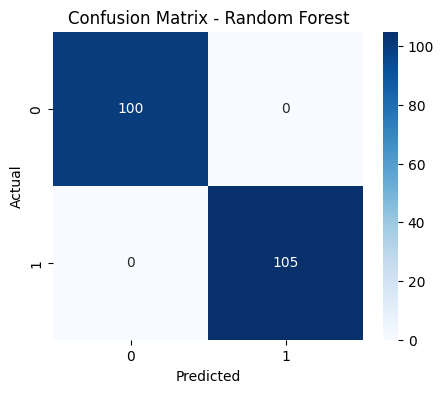

In [65]:
# Pick Random Forest (best performing 100%)
best_model = models["Random Forest"]

y_pred = best_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

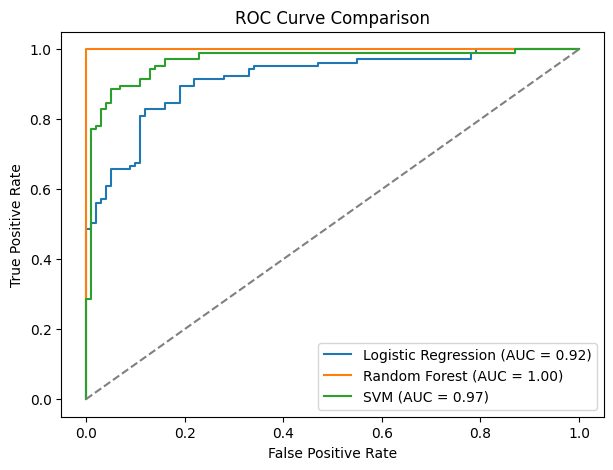

In [66]:
plt.figure(figsize=(7,5))

for name, model in models.items():
    y_prob = model.predict_proba(X_test_scaled)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0,1],[0,1],'--',color='gray')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [67]:
# Add predicted probability as risk score
risk_prob = best_model.predict_proba(X)[:, 1]
df_encoded['risk_score'] = risk_prob

print(df_encoded[['risk_score', 'target']].head())

print(df_encoded[['risk_score', 'target']].tail())

   risk_score  target
0       0.300       0
1       0.165       0
2       0.195       0
3       0.285       0
4       0.360       0
      risk_score  target
1020       0.570       1
1021       0.135       0
1022       0.200       0
1023       0.400       1
1024       0.225       0


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [68]:
#clustering the health features
cluster_features = ['age', 'cholestoral', 'max_heart_rate', 'oldpeak', 'risk_score']
X_cluster = df_encoded[cluster_features]


In [69]:
scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)

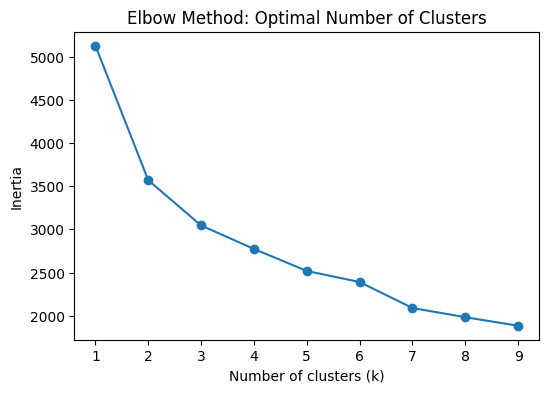

In [70]:
#Apply K-Means Clustering
inertia = []
K = range(1, 10)  # testing 1 to 9 clusters

for k in K:
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(X_cluster_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method: Optimal Number of Clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [72]:
# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=2)
df_encoded['cluster'] = kmeans.fit_predict(X_cluster_scaled)


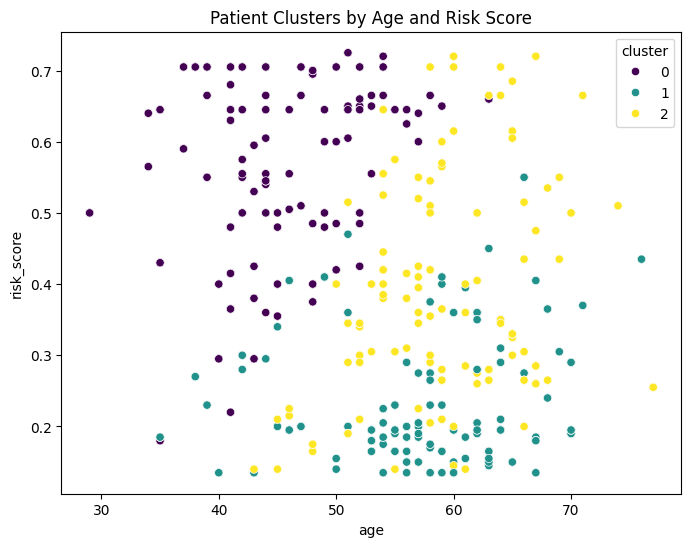

In [75]:
#visulixnf the cluster by age vs risk csore
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_encoded['age'], y=df_encoded['risk_score'], hue=df_encoded['cluster'], palette='viridis')
plt.title('Patient Clusters by Age and Risk Score')
plt.show()


In [79]:
df_encoded.groupby('cluster')[['age','cholestoral','max_heart_rate','oldpeak','risk_score']].mean().round(2)


,age,cholestoral,max_heart_rate,oldpeak,risk_score
cluster,,,,,
0,45.87,224.46,167.15,0.35,0.57
1,57.33,247.30,128.54,2.21,0.23
2,58.92,263.41,154.51,0.53,0.39


Saving the model and Deploying it!


In [80]:
import joblib

# Save trained Random Forest model
joblib.dump(best_model, 'heart_disease_model.pkl')

# Save scaler used for supervised model
joblib.dump(scaler, 'supervised_scaler.pkl')

# Save KMeans model
joblib.dump(kmeans, 'segmentation_model.pkl')

# Save scaler used for clustering
joblib.dump(scaler_cluster, 'cluster_scaler.pkl')

print("✅ All models saved successfully!")


✅ All models saved successfully!


In [81]:
# Save final dataset
df_encoded.to_csv('HeartDisease_Segmented_Results.csv', index=False)
print("✅ Segmented dataset saved successfully!")


✅ Segmented dataset saved successfully!


In [82]:
from google.colab import files

files.download('heart_disease_model.pkl')
files.download('segmentation_model.pkl')
files.download('HeartDisease_Segmented_Results.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>